/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_8405/3222845845.py:14: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254

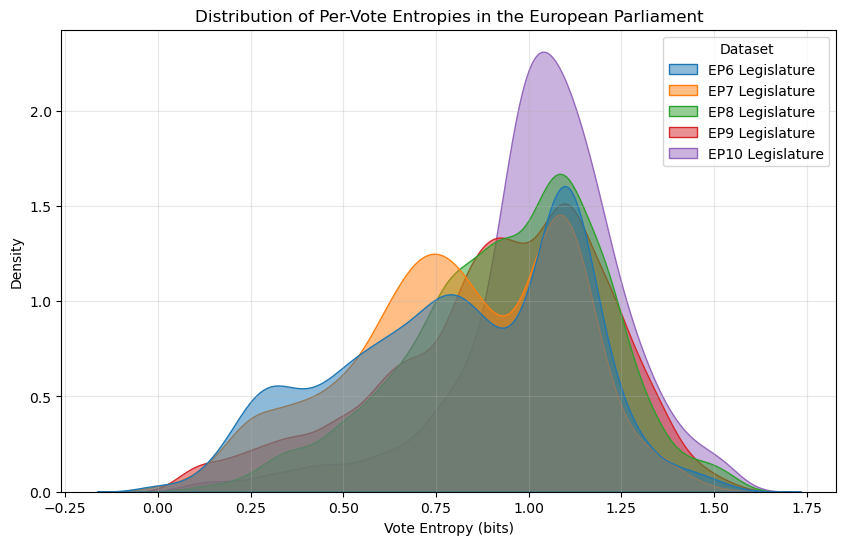

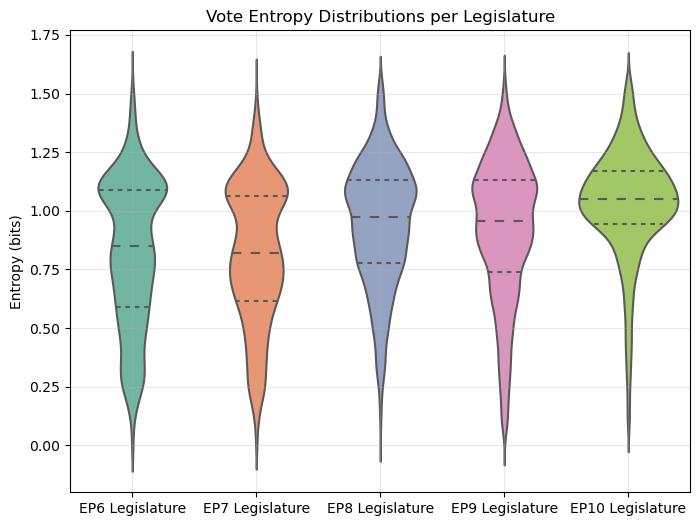

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# --- Helper: Shannon entropy per vote ---
def vote_entropy(series):
    counts = series.value_counts(dropna=True)
    probs = counts / counts.sum()
    return entropy(probs, base=2)

def compute_entropies(filepath, label):
    df = pd.read_csv(filepath)
    vote_cols = [c for c in df.columns if c.isdigit()]
    df[vote_cols] = df[vote_cols].replace({
        'FOR': 'FOR',
        'AGAINST': 'AGAINST',
        'ABSTENTION': 'ABSTENTION',
        'DID_NOT_VOTE': np.nan
    })
    entropies = df[vote_cols].apply(vote_entropy)
    return pd.DataFrame({'Entropy': entropies, 'Dataset': label})

# --- Load both datasets ---
# df_post = compute_entropies('data/post_2024_06_09/all_votes.csv', 'Post-2024 Election')
# df_pre  = compute_entropies('data/2019_to_2024/all_votes.csv', 'Pre-2024 Election')
df_EP6 = compute_entropies('data/all_votes_EP6.csv', 'EP6 Legislature')
df_EP7 = compute_entropies('data/all_votes_EP7.csv', 'EP7 Legislature')
df_EP8 = compute_entropies('data/all_votes_EP8.csv', 'EP8 Legislature')
df_EP9 = compute_entropies('data/all_votes_EP9.csv', 'EP9 Legislature')
df_EP10 = compute_entropies('data/all_votes_EP10.csv', 'EP10 Legislature')
# subsample the data to have the same number of votes

df_all = pd.concat([df_EP6, df_EP7, df_EP8, df_EP9, df_EP10], ignore_index=True)

# --- Visualization ---
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_all, x="Entropy", hue="Dataset", fill=True, common_norm=False, alpha=0.5)
plt.title("Distribution of Per-Vote Entropies in the European Parliament")
plt.xlabel("Vote Entropy (bits)")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.show()

# --- Violin plot (alternative view) ---
plt.figure(figsize=(8,6))
sns.violinplot(data=df_all, x="Dataset", y="Entropy", inner="quartile", palette="Set2")
plt.title("Vote Entropy Distributions per Legislature")
plt.ylabel("Entropy (bits)")
plt.xlabel("")
plt.grid(alpha=0.3)
plt.show()

Processing EP10 ...


Processing EP6 ...
Processing EP7 ...
Processing EP8 ...
Processing EP9 ...


/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_17953/1149512293.py:21: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,25


=== Global Entropy Shifts (Mann–Whitney U tests) ===
EP10 → EP6: p = 3.0369e-175
EP6 → EP7: p = 1.5143e-02
EP7 → EP8: p = 2.3559e-169
EP8 → EP9: p = 2.5246e-11


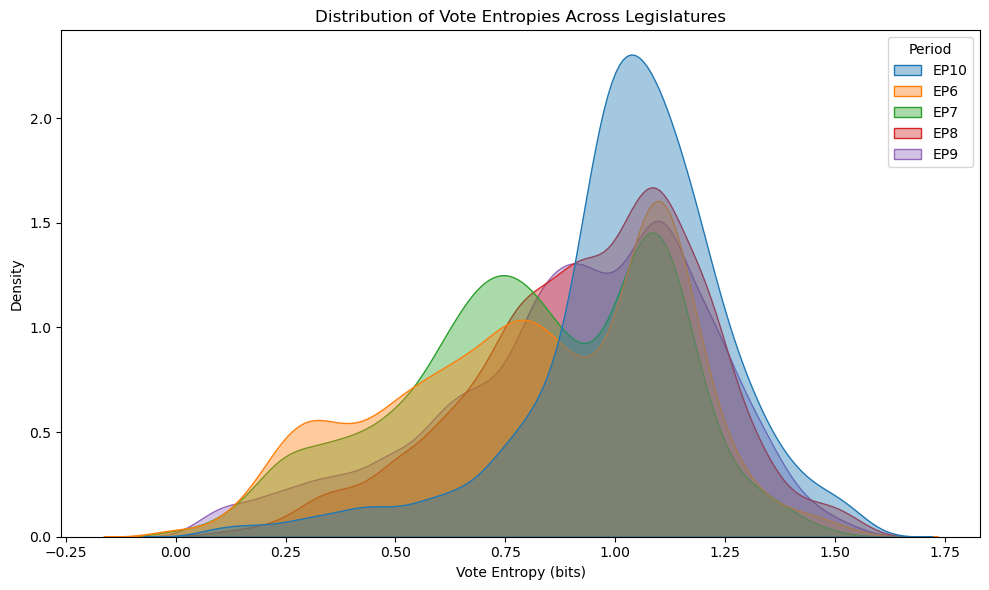

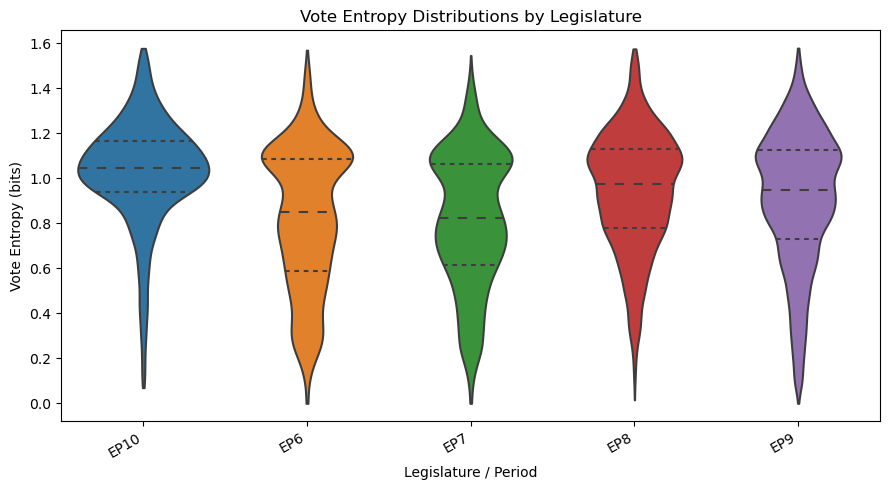

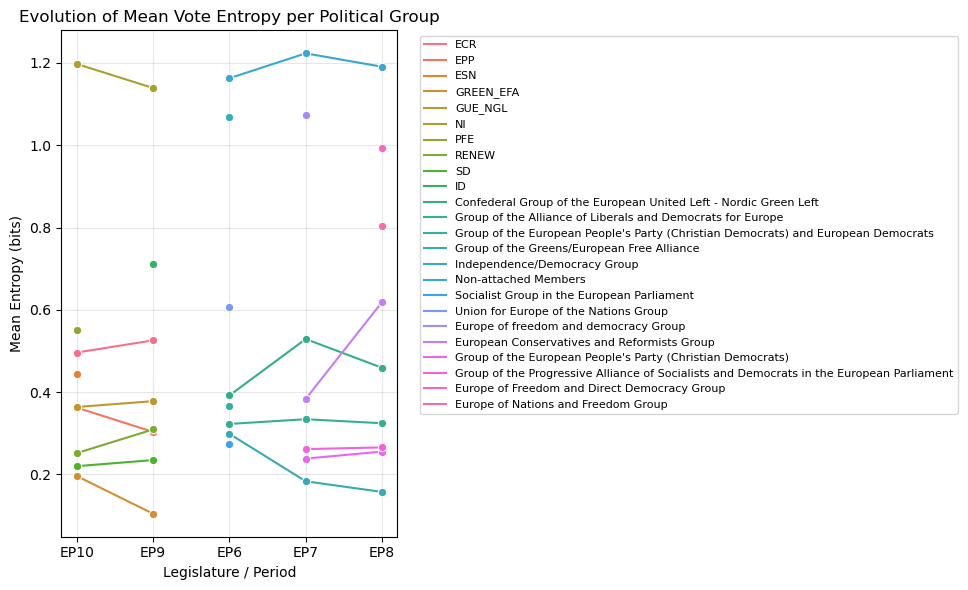

In [37]:
# === European Parliament: Multi-Legislature Entropy Comparison ===
# Efficient, vectorized version handling all EP datasets automatically

import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Helper: Shannon entropy (bits) ---
def vote_entropy(series: pd.Series) -> float:
    counts = series.value_counts(dropna=True)
    if counts.empty:
        return 0.0
    probs = counts / counts.sum()
    return -(probs * np.log2(probs)).sum()

# --- Compute all entropies for one legislature ---
def compute_entropies(data_path: str):
    df = pd.read_csv(data_path)
    vote_cols = [c for c in df.columns if c.isdigit()]
    n_votes = len(vote_cols)
    if n_votes == 0:
        raise ValueError(f"No vote columns found in {data_path}")

    # Filter MEPs with sufficient participation
    participation_rate = df[vote_cols].notna().sum(axis=1) / n_votes
    df = df.loc[participation_rate >= 0.5].copy()

    # Preprocess missing / abstention entries
    df[vote_cols] = df[vote_cols].replace({'DID_NOT_VOTE': np.nan, '': np.nan})

    # --- Per-vote entropy (vectorized) ---
    per_vote_entropies = df[vote_cols].apply(vote_entropy, axis=0)

    # --- Per-party entropy ---
    if 'member.group.short_label' in df.columns:
        party_entropies = (
            df.groupby('member.group.short_label')[vote_cols]
              .apply(lambda g: g.apply(vote_entropy, axis=0).mean())
              .dropna()
              .to_dict()
        )
    else:
        party_entropies = {}

    return per_vote_entropies, party_entropies


# --- Load all legislatures dynamically ---
data_dir = Path("data")
dataset_paths = sorted(data_dir.glob("all_votes_EP*.csv"))

period_labels = [p.stem.replace("all_votes_", "").replace("_", " ").upper() for p in dataset_paths]
all_votes = []
all_parties = {}

for label, path in zip(period_labels, dataset_paths):
    print(f"Processing {label} ...")
    per_vote, per_party = compute_entropies(path)
    tmp = pd.DataFrame({"Entropy": per_vote, "Period": label})
    all_votes.append(tmp)
    for k, v in per_party.items():
        all_parties.setdefault(k, {})[label] = v

# --- Combine all results ---
df_votes = pd.concat(all_votes, ignore_index=True)

# Build per-party DataFrame (wide format)
df_parties = pd.DataFrame(all_parties).T.reset_index(names=["Party"])
df_parties = df_parties.melt(id_vars="Party", var_name="Period", value_name="Entropy")
df_parties = df_parties.dropna()

# --- Compute pairwise Mann–Whitney tests between successive legislatures ---
periods_sorted = df_votes["Period"].unique()
print("\n=== Global Entropy Shifts (Mann–Whitney U tests) ===")
for i in range(len(periods_sorted) - 1):
    p1, p2 = periods_sorted[i], periods_sorted[i + 1]
    e1 = df_votes.loc[df_votes["Period"] == p1, "Entropy"]
    e2 = df_votes.loc[df_votes["Period"] == p2, "Entropy"]
    stat, p = mannwhitneyu(e1, e2, alternative="two-sided")
    print(f"{p1} → {p2}: p = {p:.4e}")

# --- Plot 1: Distribution of vote entropies ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_votes, x="Entropy", hue="Period", fill=True, common_norm=False, alpha=0.4)
plt.title("Distribution of Vote Entropies Across Legislatures")
plt.xlabel("Vote Entropy (bits)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# --- Plot 2: Violin plot of entropy per legislature ---
plt.figure(figsize=(9, 5))
sns.violinplot(data=df_votes, x="Period", y="Entropy", inner="quartile", palette="tab10", cut=0)
plt.title("Vote Entropy Distributions by Legislature")
plt.xlabel("Legislature / Period")
plt.ylabel("Vote Entropy (bits)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# --- Plot 3: Per-party entropy evolution ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_parties, x="Period", y="Entropy", hue="Party", marker="o")
plt.title("Evolution of Mean Vote Entropy per Political Group")
plt.ylabel("Mean Entropy (bits)")
plt.xlabel("Legislature / Period")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_33180/3698310095.py:12: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,25

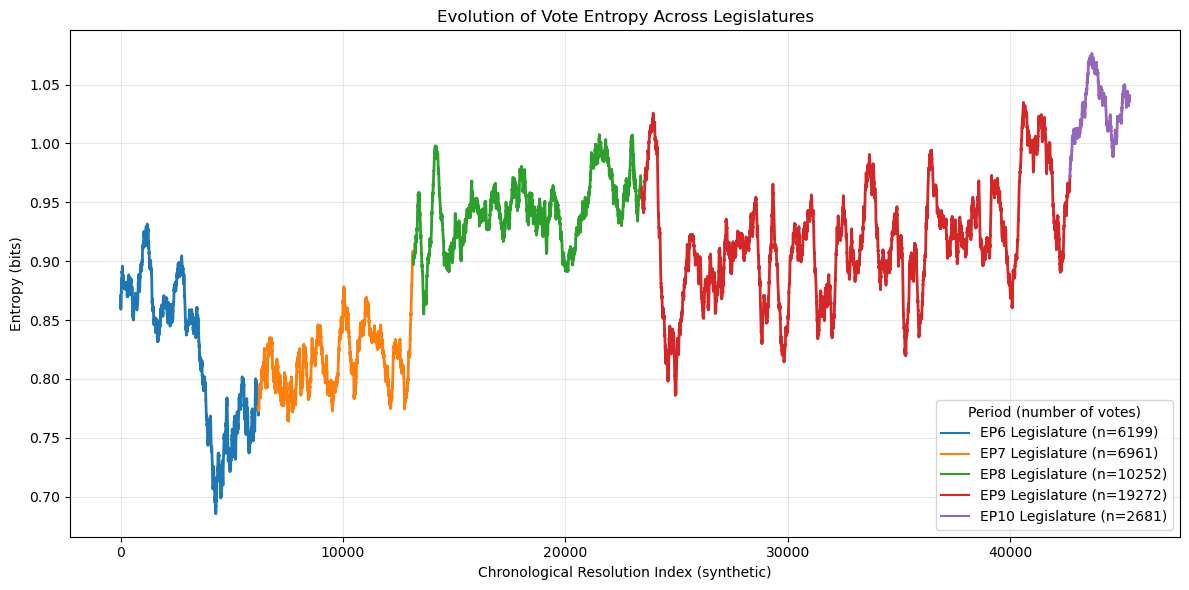

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_entropy_sequence(path):
    """
    Vectorized per-resolution entropy & DNV counts for one dataset.
    Assumes columns named with numeric vote IDs and values in:
      {'FOR','AGAINST','ABSTENTION','DID_NOT_VOTE'}.
    """
    df = pd.read_csv(path)

    # pick vote columns (numeric names), sort by ID
    vote_cols = sorted([c for c in df.columns if c.isdigit()], key=int)
    if not vote_cols:
        raise ValueError(f"No vote columns found in {path}")

    V = df[vote_cols].to_numpy(dtype=object)

    # masks (vectorized)
    m_for   = (V == 'FOR')
    m_again = (V == 'AGAINST')
    m_abst  = (V == 'ABSTENTION')
    m_dnv   = (V == 'DID_NOT_VOTE') | (V == '')

    # counts per vote (axis=0)
    c_for   = m_for.sum(axis=0).astype(float)
    c_again = m_again.sum(axis=0).astype(float)
    c_abst  = m_abst.sum(axis=0).astype(float)
    c_dnv   = m_dnv.sum(axis=0).astype(float)

    # participants = everyone except DNV
    totals = c_for + c_again + c_abst #+ c_dnv
    # probabilities (avoid division by zero)
    with np.errstate(divide='ignore', invalid='ignore'):
        p = np.vstack([
            np.where(totals > 0, c_for   / totals, 0.0),
            np.where(totals > 0, c_again / totals, 0.0),
            np.where(totals > 0, c_abst  / totals, 0.0),
            #np.where(totals > 0, c_dnv  / totals, 0.0),
        ])
        # entropy across the 3 categories
        ent = -np.nansum(np.where(p > 0, p * np.log2(p), 0.0), axis=0)

    out = pd.DataFrame({
        "Resolution_ID": list(map(int, vote_cols)),
        "Entropy": ent,
        "DID_NOT_VOTE": c_dnv
    }).sort_values("Resolution_ID").reset_index(drop=True)

    return out


# --- Compute for each legislature ---
datasets = {
    'EP6 Legislature': 'data/all_votes_EP6.csv',
    'EP7 Legislature': 'data/all_votes_EP7.csv',
    'EP8 Legislature': 'data/all_votes_EP8.csv',
    'EP9 Legislature': 'data/all_votes_EP9.csv',
    'EP10 Legislature': 'data/all_votes_EP10.csv',
}

dfs = []
offset = 0
labels_with_counts = []

for label, path in datasets.items():
    d = compute_entropy_sequence(path)
    n_votes = len(d)
    label_with_n = f"{label} (n={n_votes})"
    d['Period'] = label_with_n
    d['Chrono_ID'] = np.arange(offset + 1, offset + len(d) + 1, dtype=int)
    offset += len(d)
    dfs.append(d)
    labels_with_counts.append(label_with_n)

df_all = pd.concat(dfs, ignore_index=True)

# smooth (larger window -> smoother curve; adjust as needed)
df_all['Smoothed'] = df_all['Entropy'].rolling(window=500, center=True, min_periods=50).mean()
df_all['DID_NOT_VOTE'] = df_all['DID_NOT_VOTE'].rolling(window=500, center=True, min_periods=50).mean()

# --- Plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x='Chrono_ID', y='Smoothed', hue='Period', lw=2)
plt.title("Evolution of Vote Entropy Across Legislatures")
plt.xlabel("Chronological Resolution Index (synthetic)")
plt.ylabel("Entropy (bits)")
plt.grid(alpha=0.3)
plt.legend(title="Period (number of votes)", loc='lower right')
plt.tight_layout()
plt.show()

In [42]:
# print average number of DNV for each legislature
print(df_all.groupby('Period')['DID_NOT_VOTE'].mean())

Period
EP10 Legislature (n=2681)     89.823706
EP6 Legislature (n=6199)     159.815046
EP7 Legislature (n=6961)     121.790200
EP8 Legislature (n=10252)     98.314857
EP9 Legislature (n=19272)     52.386315
Name: DID_NOT_VOTE, dtype: float64


# only take main votes now

▶️ Computing for EP6 Legislature
▶️ Computing for EP7 Legislature
▶️ Computing for EP8 Legislature
▶️ Computing for EP9 Legislature
▶️ Computing for EP10 Legislature


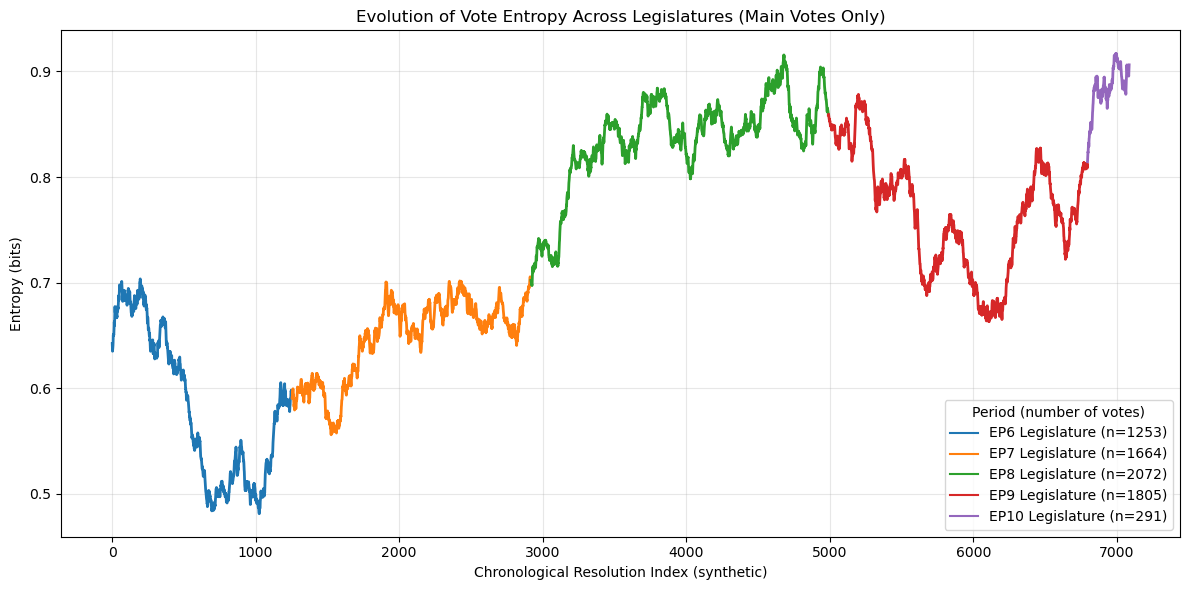

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def compute_entropy_sequence(path, EP):
    """
    Compute per-resolution entropy & DID_NOT_VOTE counts for one dataset.
    EP6–EP8 → use Final vote? == 1.0 or 0.0
    EP9–EP10 → use is_main == True
    """
    df = pd.read_csv(path, low_memory=False)

    # --- Detect vote columns ---
    vote_cols = sorted([c for c in df.columns if c.isdigit()], key=int)
    if not vote_cols:
        raise ValueError(f"No numeric vote columns found in {path}")
    df = df[vote_cols]

    # --- Load metadata file ---
    if EP in [9, 10]:
        meta = pd.read_csv("data/votes_htv_df.csv", low_memory=False)
        meta = meta[meta["id"] < 169338] if EP == 9 else meta[meta["id"] > 169338]
        selected_votes = meta.loc[meta["is_main"] == True, "id"].astype(str).tolist()
    else:
        meta_path = f"data/votewatch_csv/EP{EP}_Voted docs.csv"
        meta = pd.read_csv(meta_path, low_memory=False)

        # detect correct column name
        if "Final vote?" in meta.columns:
            final_col = "Final vote?"
        elif "final_vote" in meta.columns:
            final_col = "final_vote"
        else:
            raise KeyError(f"No Final vote? column found in EP{EP} metadata")

        id_col = "Vote ID" if "Vote ID" in meta.columns else "euro_act_id"

        # select only where Final vote? is 1.0 or 0.0
        selected_votes = meta.loc[meta[final_col].isin([1.0]), id_col].astype(str).tolist()

    # --- Keep only votes that exist in df ---
    valid_votes = [v for v in selected_votes if v in df.columns]
    if len(valid_votes) == 0:
        print(f"⚠️ EP{EP}: No valid votes found, using all vote columns.")
        valid_votes = vote_cols
    n_votes = len(valid_votes)

    # --- Extract vote matrix ---
    V = df[valid_votes].to_numpy(dtype=object)

    # --- Masks ---
    m_for   = (V == 'FOR')
    m_again = (V == 'AGAINST')
    m_abst  = (V == 'ABSTENTION')
    m_dnv   = (V == 'DID_NOT_VOTE') | (V == '')

    # --- Counts per vote ---
    c_for   = m_for.sum(axis=0).astype(float)
    c_again = m_again.sum(axis=0).astype(float)
    c_abst  = m_abst.sum(axis=0).astype(float)
    c_dnv   = m_dnv.sum(axis=0).astype(float)

    totals = c_for + c_again + c_abst
    with np.errstate(divide='ignore', invalid='ignore'):
        p = np.vstack([
            np.where(totals > 0, c_for   / totals, 0.0),
            np.where(totals > 0, c_again / totals, 0.0),
            np.where(totals > 0, c_abst  / totals, 0.0),
        ])
        ent = -np.nansum(np.where(p > 0, p * np.log2(p), 0.0), axis=0)

    # --- Output dataframe ---
    out = pd.DataFrame({
        "Resolution_ID": list(map(int, valid_votes)),
        "Entropy": ent,
        "DID_NOT_VOTE": c_dnv
    }).sort_values("Resolution_ID").reset_index(drop=True)

    return out, n_votes


# --- Compute for each legislature ---
datasets = {
    'EP6 Legislature': ('data/all_votes_EP6.csv', 6),
    'EP7 Legislature': ('data/all_votes_EP7.csv', 7),
    'EP8 Legislature': ('data/all_votes_EP8.csv', 8),
    'EP9 Legislature': ('data/all_votes_EP9.csv', 9),
    'EP10 Legislature': ('data/all_votes_EP10.csv', 10),
}

dfs = []
offset = 0
labels_with_counts = []

for label, (path, EP) in datasets.items():
    print(f"▶️ Computing for {label}")
    d, n_votes = compute_entropy_sequence(path, EP)
    label_with_n = f"{label} (n={n_votes})"
    d['Period'] = label_with_n
    d['Chrono_ID'] = np.arange(offset + 1, offset + len(d) + 1, dtype=int)
    offset += len(d)
    dfs.append(d)
    labels_with_counts.append(label_with_n)

df_all = pd.concat(dfs, ignore_index=True)

# --- Smooth trends ---
df_all['Entropy_Smoothed'] = df_all['Entropy'].rolling(window=200, center=True, min_periods=50).mean()
df_all['DNV_Smoothed'] = df_all['DID_NOT_VOTE'].rolling(window=200, center=True, min_periods=50).mean()

# --- Plot ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x='Chrono_ID', y='Entropy_Smoothed', hue='Period', lw=2)
#sns.lineplot(data=df_all, x='Chrono_ID', y='DNV_Smoothed', hue='Period', lw=2)
plt.title("Evolution of Vote Entropy Across Legislatures (Main Votes Only)")
plt.xlabel("Chronological Resolution Index (synthetic)")
plt.ylabel("Entropy (bits)")
plt.grid(alpha=0.3)
plt.legend(title="Period (number of votes)", loc='lower right')
plt.tight_layout()
plt.show()

Processing EP6 ...
Processing EP7 ...
Processing EP8 ...
Processing EP9 ...
Processing EP10 ...

=== Global Entropy Shifts (Mann–Whitney U tests) ===
EP6 → EP7: p = 7.8432e-09
EP7 → EP8: p = 2.4329e-68
EP8 → EP9: p = 1.1791e-09
EP9 → EP10: p = 1.6489e-10


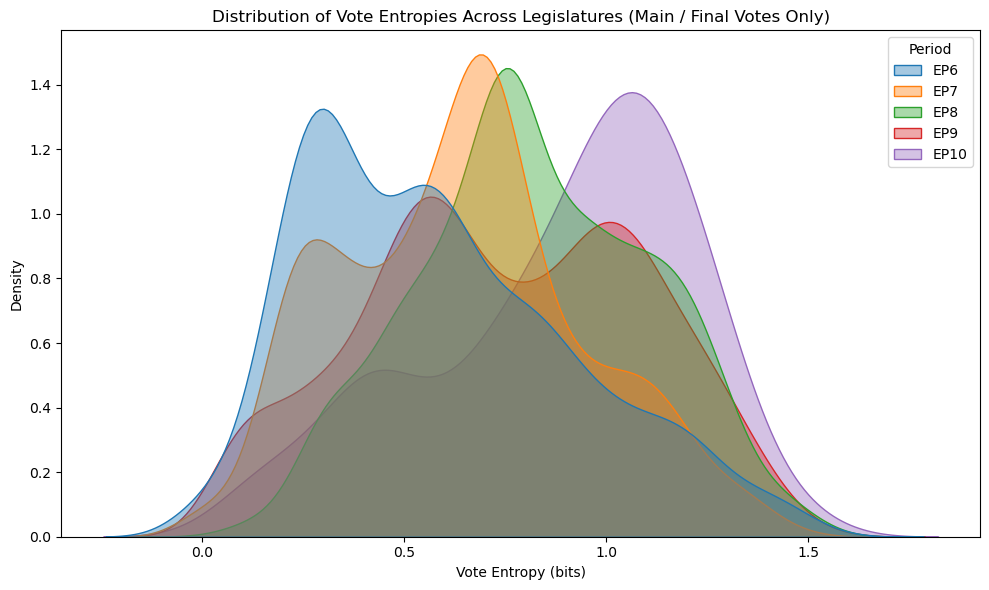

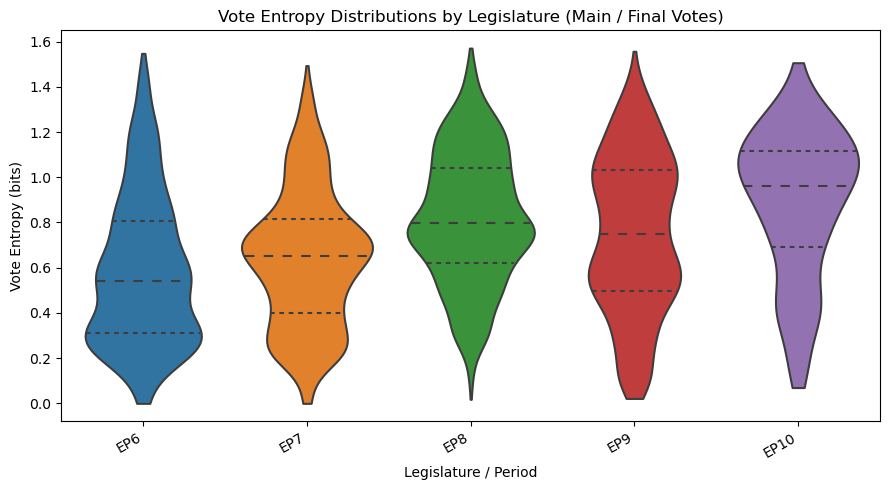

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


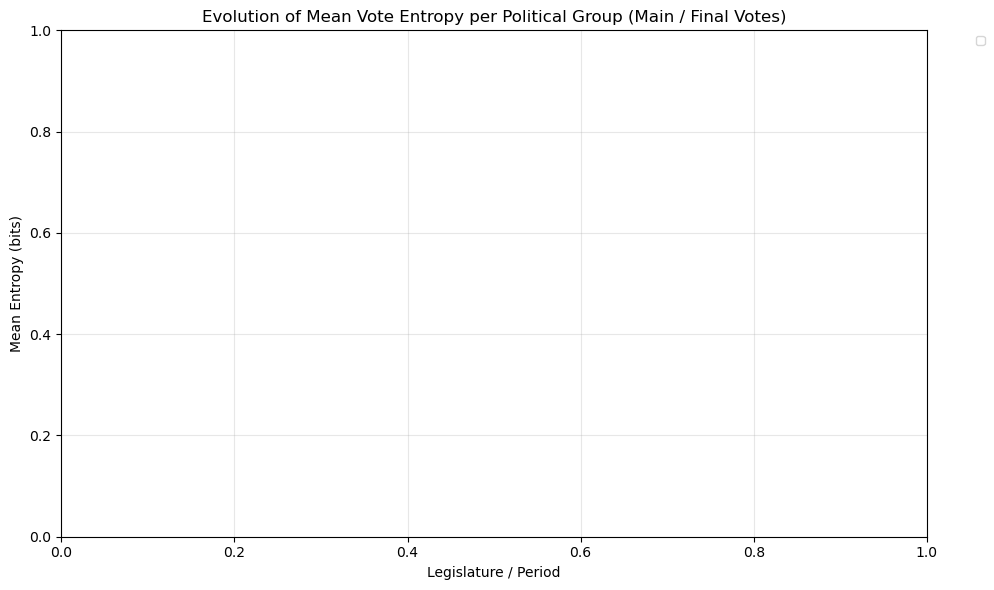

In [38]:
# === European Parliament: Multi-Legislature Entropy Comparison (Main Votes Only) ===

import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# --- Helper: Shannon entropy (bits) ---
def vote_entropy(series: pd.Series) -> float:
    counts = series.value_counts(dropna=True)
    if counts.empty:
        return 0.0
    probs = counts / counts.sum()
    return -(probs * np.log2(probs)).sum()


# --- Compute all entropies for one legislature (filtered to main/final votes) ---
def compute_entropies(data_path: str, EP: int):
    df = pd.read_csv(data_path, low_memory=False)
    vote_cols = [c for c in df.columns if c.isdigit()]
    if len(vote_cols) == 0:
        raise ValueError(f"No numeric vote columns found in {data_path}")

    # --- Load metadata and select only main/final votes ---
    if EP in [9, 10]:
        meta = pd.read_csv("data/votes_htv_df.csv", low_memory=False)
        meta = meta[meta["id"] < 169338] if EP == 9 else meta[meta["id"] > 169338]
        selected_votes = meta.loc[meta["is_main"] == True, "id"].astype(str).tolist()
    else:
        meta_path = f"data/votewatch_csv/EP{EP}_Voted docs.csv"
        meta = pd.read_csv(meta_path, low_memory=False)

        if "Final vote?" in meta.columns:
            final_col = "Final vote?"
        elif "final_vote" in meta.columns:
            final_col = "final_vote"
        else:
            raise KeyError(f"No 'Final vote?' column found for EP{EP}")

        id_col = "Vote ID" if "Vote ID" in meta.columns else "euro_act_id"
        selected_votes = meta.loc[meta[final_col].isin([1.0]), id_col].astype(str).tolist()

    # keep only valid votes
    valid_votes = [c for c in vote_cols if c in selected_votes]
    if len(valid_votes) == 0:
        print(f"⚠️ EP{EP}: No valid votes found, using all votes instead.")
        valid_votes = vote_cols

    df = df[valid_votes]

    # --- Clean data ---
    df = df.replace({'DID_NOT_VOTE': np.nan, '': np.nan})

    # --- Drop MEPs with very low participation (<50%) ---
    participation_rate = df.notna().sum(axis=1) / len(valid_votes)
    df = df.loc[participation_rate >= 0.5]

    # --- Per-vote entropy (vectorized) ---
    per_vote_entropies = df.apply(vote_entropy, axis=0)

    # --- Per-party entropy (mean over votes) ---
    if 'member.group.short_label' in df.columns:
        party_entropies = (
            df.groupby('member.group.short_label')[valid_votes]
              .apply(lambda g: g.apply(vote_entropy, axis=0).mean())
              .dropna()
              .to_dict()
        )
    else:
        party_entropies = {}

    return per_vote_entropies, party_entropies


# --- Run for all legislatures ---
datasets = {
    6: "data/all_votes_EP6.csv",
    7: "data/all_votes_EP7.csv",
    8: "data/all_votes_EP8.csv",
    9: "data/all_votes_EP9.csv",
    10: "data/all_votes_EP10.csv"
}

all_votes = []
all_parties = {}

for EP, path in datasets.items():
    label = f"EP{EP}"
    print(f"Processing {label} ...")
    per_vote, per_party = compute_entropies(path, EP)
    tmp = pd.DataFrame({"Entropy": per_vote, "Period": label})
    all_votes.append(tmp)
    for k, v in per_party.items():
        all_parties.setdefault(k, {})[label] = v

df_votes = pd.concat(all_votes, ignore_index=True)

# --- Per-party dataframe ---
df_parties = pd.DataFrame(all_parties).T.reset_index(names=["Party"])
df_parties = df_parties.melt(id_vars="Party", var_name="Period", value_name="Entropy")
df_parties = df_parties.dropna()

# --- Mann–Whitney U test between successive legislatures ---
periods_sorted = sorted(df_votes["Period"].unique(), key=lambda x: int(x[2:]))
print("\n=== Global Entropy Shifts (Mann–Whitney U tests) ===")
for i in range(len(periods_sorted) - 1):
    p1, p2 = periods_sorted[i], periods_sorted[i + 1]
    e1 = df_votes.loc[df_votes["Period"] == p1, "Entropy"]
    e2 = df_votes.loc[df_votes["Period"] == p2, "Entropy"]
    stat, p = mannwhitneyu(e1, e2, alternative="two-sided")
    print(f"{p1} → {p2}: p = {p:.4e}")

# --- Plot 1: KDE of vote entropies ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_votes, x="Entropy", hue="Period", fill=True, common_norm=False, alpha=0.4)
plt.title("Distribution of Vote Entropies Across Legislatures (Main / Final Votes Only)")
plt.xlabel("Vote Entropy (bits)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# --- Plot 2: Violinplot per legislature ---
plt.figure(figsize=(9, 5))
sns.violinplot(data=df_votes, x="Period", y="Entropy", inner="quartile", palette="tab10", cut=0)
plt.title("Vote Entropy Distributions by Legislature (Main / Final Votes)")
plt.xlabel("Legislature / Period")
plt.ylabel("Vote Entropy (bits)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# --- Plot 3: Per-party entropy evolution ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_parties, x="Period", y="Entropy", hue="Party", marker="o")
plt.title("Evolution of Mean Vote Entropy per Political Group (Main / Final Votes)")
plt.ylabel("Mean Entropy (bits)")
plt.xlabel("Legislature / Period")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()